In [1]:
#upload random_1000.csv to the notebook then run
#in the end, private_query.txt will be generated to contain the results

In [2]:
import io
import pandas as pd
import random
import numpy
import matplotlib.pyplot as plt
from google.colab import files


In [3]:

df = pd.read_csv('random_1000.csv')


In [4]:
df.count

<bound method DataFrame.count of                       course_id       userid_DI  ... gender ndays_act
0    HarvardX/CB22x/2013_Spring  MHxPC130069875  ...      m         4
1    HarvardX/CB22x/2013_Spring  MHxPC130114587  ...      m         4
2    HarvardX/CB22x/2013_Spring  MHxPC130122866  ...      m         1
3    HarvardX/CB22x/2013_Spring  MHxPC130470188  ...      m         2
4    HarvardX/CB22x/2013_Spring  MHxPC130263156  ...      m         2
..                          ...             ...  ...    ...       ...
995  HarvardX/CB22x/2013_Spring  MHxPC130289759  ...      f         1
996  HarvardX/CB22x/2013_Spring  MHxPC130474924  ...      m         4
997  HarvardX/CB22x/2013_Spring  MHxPC130153023  ...      f         1
998  HarvardX/CB22x/2013_Spring  MHxPC130233232  ...      m         0
999  HarvardX/CB22x/2013_Spring  MHxPC130167152  ...      f         0

[1000 rows x 7 columns]>

In [5]:
n = len(df.index) #1000
m = 10
query = 'India'
uniform_range_lower = 0
uniform_range_upper = 1
sigma_2 = 1

In [6]:
df.iloc[0]

course_id            HarvardX/CB22x/2013_Spring
userid_DI                        MHxPC130069875
final_cc_cname_DI                         India
LoE_DI                                Secondary
YoB                                        1994
gender                                        m
ndays_act                                     4
Name: 0, dtype: object

In [7]:
df.iloc[0,2]

'India'

In [8]:
def counting_queries(df, query, m, n, uniform_range_lower, uniform_range_upper, sigma_2):
  
  q = [0 for i in range(n)]
  for i in range(n):
    if df.iloc[i,2] == query:       #if entry matches query
      q[i] = 1

  
  random_arr = [[random.uniform(0,1) for i in range(m)] for j in range(n)]
  random_arr[0]

  for i in range(n):
    random_arr[i][-1] = q[i] - sum(random_arr[i][:-1])
  random_arr[0]

  x = zip(*random_arr)
  curator_output = []
  for y in x:
    curator_output.append(sum(y))

  curator_noisy = []
  for c in curator_output:
    curator_noisy.append(random.gauss(c, sigma_2))

  private_ans = sum(curator_noisy)

  

  return private_ans

In [9]:
def true_query_value(query, n):
  q = [0 for i in range(n)]
  for i in range(n):
    if df.iloc[i,2] == query:       #if entry matches query
      q[i] = 1

  actual_ans = sum(q)
  return actual_ans

In [10]:
x = counting_queries(df=df, query=query, m=m, n=n, uniform_range_lower=uniform_range_lower, uniform_range_upper=uniform_range_upper, sigma_2=sigma_2)
x

106.32738561154292

In [11]:
m_list = []
for i in range(1,n+1):
  """
  if i <= 100:
    m_list.append(i)
  elif i%10 == 0:
    m_list.append(i)
  """
  m_list.append(i)




In [12]:
private_ans = []
for m in m_list:
  y = counting_queries(df=df, query=query, m=m, n=n, uniform_range_lower=uniform_range_lower, uniform_range_upper=uniform_range_upper, sigma_2=sigma_2)
  print(m,y)
  private_ans.append((m,y))

actual_ans = true_query_value(query, n)
actual_ans 


1 103.5013086392699
2 106.70628240778666
3 102.13511226233459
4 102.44631608094573
5 98.12602869089073
6 105.94217194518524
7 104.20505316439176
8 106.52287576560002
9 102.24153465379413
10 105.40756702993713
11 102.18778161203318
12 102.90611611851728
13 103.07447504836819
14 108.85220101124742
15 106.69149757704236
16 99.79040999351582
17 102.74486415596766
18 102.88143114238665
19 99.89109432068653
20 112.44946869142586
21 102.48663195653353
22 98.90389722728833
23 100.95640906199696
24 110.57090619719384
25 105.50718438928016
26 106.67622706694783
27 111.73041534914955
28 98.4251470233321
29 95.08831187762917
30 90.71551085691681
31 106.68562928202482
32 104.05651629691238
33 109.94298700368745
34 92.78762624594674
35 96.66110396446311
36 92.29195601547326
37 117.07075840274047
38 115.28024381922296
39 117.98371912115908
40 107.47017061951192
41 102.01454032653055
42 103.67802637373097
43 107.97468379766724
44 113.15160826484862
45 100.58822574245278
46 102.52785551507986
47 96.833

104

In [13]:
textfile = open("couting_query_gaussian.txt", "w")
for element in private_ans:
  
  textfile.write(','.join(str(e) for e in element))
  textfile.write("\n")
textfile.close()

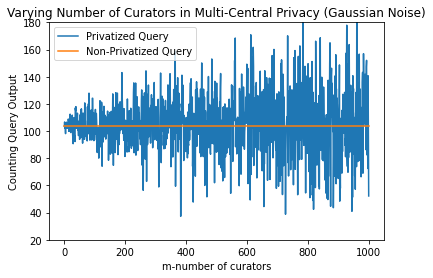

In [14]:
actual_ans_list = [actual_ans for i in range(n)]  #n=1000, m=1-1000
private_ans_list = [p[1] for p in private_ans ]

plt.plot(m_list, private_ans_list, label="Privatized Query")
plt.plot(m_list, actual_ans_list, label="Non-Privatized Query")

plt.plot()

plt.xlabel("m-number of curators")
plt.ylabel("Counting Query Output")
plt.title("Varying Number of Curators in Multi-Central Privacy (Gaussian Noise)")
plt.legend()
plt.ylim([20, 180])
plt.savefig('counting_query_gaussian.png')
plt.show()


In [15]:
# n = 100     
# m_list = []
# for i in range(1,n+1):
#   m_list.append(i)
# private_ans = []
# for m in m_list:
#   y = counting_queries(df=df, query=query, m=m, n=n, uniform_range_lower=uniform_range_lower, uniform_range_upper=uniform_range_upper, sigma_2=sigma_2)
#   print(m,y)
#   private_ans.append((m,y))

# actual_ans = true_query_value(query, n)
# actual_ans 

In [16]:
# actual_ans_list = [actual_ans for i in range(n)]        
# private_ans_list = [p[1] for p in private_ans ]
# plt.plot(m_list, private_ans_list, label="Privatized Query")
# plt.plot(m_list, actual_ans_list, label="Non-Privatized Query")
# plt.plot()

# plt.xlabel("m-number of curators")
# plt.ylabel("Counting Query Output")
# plt.title("Varying Number of Curators in Multi-Central Privacy (Gaussian Noise)")    #n=100, m=1-100
# plt.legend()
# plt.show()  

In [17]:
#utility evaluation
n_list = [100, 500, 1000]
m_list2 = [1, 10, 50, 100, 500, 1000]

actual_ans = true_query_value(query, n)

textfile = open("varying_n.txt", "w")
for n in n_list:
  util = []
  for m in m_list2:
    if m <= n:
      error = []
      for i in range(100):
        y = counting_queries(df=df, query=query, m=m, n=n, uniform_range_lower=uniform_range_lower, uniform_range_upper=uniform_range_upper, sigma_2=sigma_2)
        error.append(abs(actual_ans-y)/n)
      average_error = sum(error)/len(error)
      print(n, m, average_error)
      util.append((m, average_error))

  for element in util:
    textfile.write(f'n={n},m={element[0]},error={element[1]}')
    textfile.write(','.join(str(e) for e in element))
    textfile.write("\n")

textfile.close()


100 1 0.8802677672671132
100 10 0.880005800762366
100 50 0.8694573461296006
100 100 0.8845940502477508
500 1 0.10019797540728909
500 10 0.09962431512738307
500 50 0.10028745986259845
500 100 0.10309918551348073
500 500 0.09945195972025653
1000 1 0.000718652591910119
1000 10 0.00256803293911883
1000 50 0.005281525035524356
1000 100 0.008408603401632644
1000 500 0.018239972678512562
1000 1000 0.02519923151370661
